In [ ]:
import numpy as np

import matplotlib.pyplot as pl

import pymprog as pm

%matplotlib inline

#define load deman as hourly set using normalized value
Pd = [0.4,0.3,0.3,0.3,0.5,0.6,0.8,1.0,1.25,1.25,1.3,1.35,1.1,1.25,1.35,1.2,1.0,0.8,0.75,0.7,0.7,0.6,0.6,0.5]

N =len(Pd)
x = range(N)
width = 1/1.25

"""
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
"""

pl.figure(1,figsize=(8,6))
pl.rc('font', size = 15)
pl.bar(x,Pd,width, color ="orange",alpha=0.5)
pl.ylim(ymin=0)


#plt.savefig('Basic.pdf', bbox_inches='tight')


#Energy calculation

y= sum(Pd)
print(y)


pm.begin('dispatch')
x = pm.var('x',3)

c = pm.par('c', [151, 145, 150])
print(c)

print(x,c)

pm.minimize(sum(c[i]*x[i] for i in range(3)))

x[0] + x[1] + x[2] == 1.25
x[1] <=0.4 and x[1] >= 0.2
x[0] <= 0.5 and x[0] >= 0.2
x[2] <= 0.35 and x[2] >= 0.2
x[0]+x[2] <=0.5
pm.solve()
pm.sensitivity()
pm.end()

#for j in range(len(Pd)):
#    p = Pd[j]
#    print(p)
    

solver Status: problem has no feasible solution
solver Status: problem has no feasible solution
solver Status: problem has no feasible solution
solver Status: problem has no feasible solution
solver Status: problem has no feasible solution
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: solution is optimal
solver Status: problem has no feasible solution


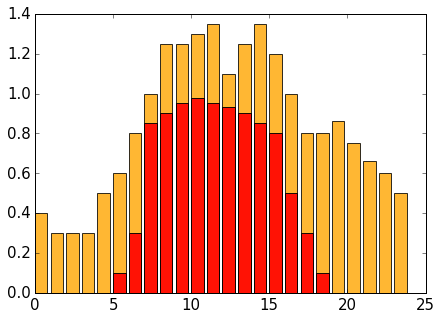

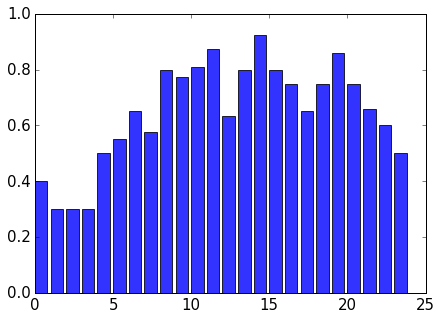

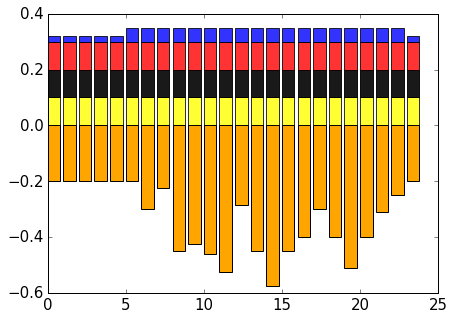

In [1]:
import numpy as np

import matplotlib.pyplot as pl

import pymprog as pm

%matplotlib inline

#define load deman as hourly set using normalized value
Pd = [0.4,0.3,0.3,0.3,0.5,0.6,0.8,1.0,1.25,1.25,1.3,1.35,1.1,1.25,1.35,1.2,1.0,0.8,0.8,0.86,0.75,0.66,0.6,0.5]
Pv = [0,0,0,0,0,0.1,0.3,0.85,0.9,0.95,0.98,0.95,0.93,0.9,0.85,0.8,0.5,0.3,0.1,0,0,0,0,0]
N =len(Pd)
x = range(N)
width = 1/1.25
Pvay = 0.5*np.array(Pv)
#PV penetration is 20 percent
Pnet = np.array(Pd) - Pvay
#print(0.2*Pvay)

pl.figure(1,figsize=(7,5))
pl.rc('font',size =14)
pl.bar(x,Pd,width, color ="orange",alpha=0.8)
pl.bar(x,Pv,width,color='red',alpha=0.9)
pl.ylim(ymin=0)


pl.figure(2,figsize=(7,5))
pl.rc('font',size =14)
pl.bar(x,Pnet,width, color ="blue",alpha=0.8)
#pl.ylim(ymin=0)
#Energy calculation

y= sum(Pd)
#print(y)

gen1 =[]

for j in range(N):
    pm.begin('dispatch')
    x = pm.var('x',5)
    
    c = pm.par('c', [151.1, 152.0, 150.0,151.2,200.0])
    ed = pm.par('ed',[200.0,300.0,150.0,250.0,125.0])
    pd = pm.par('pd',[200.0,300.0,150.0,250.0,125.0])
    #print(c)
    #print(x,c)
    
    pm.minimize(sum(c[i]*x[i] for i in range(3)))
    
    x[0] + x[1] + x[2]+x[3]+x[4] == Pnet[j]
    x[1] <=0.8 and x[1] >= 0.1
    x[0] <= 0.3 and x[0] >= 0.1
    x[2] <= 0.35 and x[2] >= 0.1
    x[3]<=0.05 and x[3] >= 0.02
    x[4]>=0.2 and x[4] <=0.8
    #x[0]+x[2]<=0.25
    pm.solve()
    
    #pm.save(mps='_save.mps', sol='_save.sol',
     #clp='_save.clp', glp='_save.glp', 
     #sen='_save.sen', ipt='_save.ipt',
     #mip='_save.mip')
    
    #gen1.append(rr)
    #pm.sensitivity()
    #print(pm.vobj())
    gen1.append([x[0].primal,x[1].primal,x[2].primal,x[3].primal,-x[4].primal])
    #print(x[0].primal,x[1].primal,x[2].primal)
    #print(pm.sensitivity())
    print("solver Status: %s"%pm.status())
    pm.end()

a=[]
b=[]
c=[]
d=[]
e=[]
cstack=[]
cstack3=[]
cstacks=[]

#preparing data for plotting stacked bar graphs

for jj in range(len(gen1)):
    a.append(gen1[jj][0])
    b.append(gen1[jj][1])
    c.append(gen1[jj][2])
    d.append(gen1[jj][3])
    e.append(gen1[jj][4])
    cstack.append(gen1[jj][0]+gen1[jj][1])
    cstack3.append(gen1[jj][0]+gen1[jj][1]+gen1[jj][2])
    cstacks.append(gen1[jj][0]+gen1[jj][1]+gen1[jj][2]+gen1[jj][3])
    
#print(gen1)

N2 =len(gen1)
xx = range(N2)
width = 1/1.25

pl.figure(3,figsize=(7,5))
#pl.figure(1,figsize=(8,6))
pl.rc('font', size = 15)
p1=pl.bar(xx,a,width,color="yellow",alpha=0.8)
p2=pl.bar(xx,b,width,bottom=a,color="black",alpha=0.9)
p3=pl.bar(xx,c,width,bottom=cstack,color="red",alpha=0.8)
p4=pl.bar(xx,d,width,bottom=cstack3,color="blue",alpha=0.8)
p5=pl.bar(xx,e,width,color="orange")
